# creat a reg directory for each subject and copy functional anatomical and atlas data

In [22]:
# creat reg directory in each subject folter and run independent registration over subjects
import os
import glob
from shutil import copyfile, rmtree

data_path = '/mnt/d/Data/Chick/analysis/imprinting_2019/'
#subdirs = glob.glob('%s/sub00[1-9]/run00[1-2]'%(data_path))#lob.glob('%s/sub[0-9][0-9][0-9]'%(path))
subdirs = glob.glob('%s/sub*'%(data_path))


for dir in subdirs:
    dst = os.path.join(dir,'reg')
    print(dst)
    if os.path.exists(dst):
        rmtree(dst)
    else:
        pass
    os.mkdir(dst)
    
    src_anat = os.path.join(dir,'anat/anat.nii.gz')
    dst_anat = os.path.join(dir,'reg/anat.nii.gz')
    
    src_example_func = os.path.join(dir,'func/double-gamma.feat/reg/example_func.nii.gz')
    dst_example_func = os.path.join(dir,'reg/example_func.nii.gz')

    src_highres = os.path.join(dir,'func/double-gamma.feat/reg/highres.nii.gz')
    dst_highres = os.path.join(dir,'reg/highres.nii.gz')

    src_highres_head = os.path.join(dir,'func/double-gamma.feat/reg/highres_head.nii.gz')
    dst_highres_head = os.path.join(dir,'reg/highres_head.nii.gz')

    src_standard = os.path.join(dir,'func/double-gamma.feat/reg/standard.nii.gz')
    dst_standard = os.path.join(dir,'reg/standard.nii.gz')

    src_standard_head = os.path.join(dir,'func/double-gamma.feat/reg/standard_head.nii.gz')
    dst_standard_head = os.path.join(dir,'reg/standard_head.nii.gz')

    src_standard_mask = os.path.join(dir,'func/double-gamma.feat/reg/standard_mask.nii.gz') 
    dst_standard_mask = os.path.join(dir,'reg/standard_mask.nii.gz') 
    

    copyfile(src_anat,dst_anat)
    copyfile(src_example_func, dst_example_func)
    copyfile(src_highres, dst_highres)
    copyfile(src_highres_head, dst_highres_head)
    copyfile(src_standard, dst_standard)
    copyfile(src_standard_head, dst_standard_head)
    copyfile(src_standard_mask, dst_standard_mask)
    

/mnt/d/Data/Chick/analysis/imprinting_2019/sub09/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub11/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub12/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub14/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub16/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub18/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub19/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub21/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub22/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub24/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub27/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub28/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub29/reg


# Low res image (functiona)--> High res image (anatomical) --> Reference image (Atlas)
using nonliner registration : fnirt function

In [24]:
# register the files
import os
import glob
from shutil import copyfile, rmtree

data_path = '/mnt/d/Data/Chick/analysis/imprinting_2019/'
#subdirs = glob.glob('%s/sub00[1-9]/run00[1-2]'%(data_path))#lob.glob('%s/sub[0-9][0-9][0-9]'%(path))
subdirs = glob.glob('%s/sub*'%(data_path))

for dir in subdirs:
    path=os.path.join(dir,'reg')
    print(path)
    os.chdir(path)
    #example_func 2 highres
    os.system('flirt -in example_func.nii.gz -ref anat.nii.gz -out example_func2highres -omat example_func2highres.mat -bins 256 -cost corratio -searchrx 0 0 -searchry 0 0 -searchrz 0 0 -2D -dof 12  -interp trilinear')

    os.system('convert_xfm -inverse -omat highres2example_func.mat example_func2highres.mat')

    os.system('slicer example_func2highres highres -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png example_func2highres1.png ; /usr/local/fsl/bin/slicer highres example_func2highres -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png example_func2highres2.png ; /usr/local/fsl/bin/pngappend example_func2highres1.png - example_func2highres2.png example_func2highres.png; /bin/rm -f sl?.png example_func2highres2.png')

    os.system('rm example_func2highres1.png')

    #highres 2 standard 
    os.system('flirt -in highres -ref standard -out highres2standard -omat highres2standard.mat -bins 256 -cost corratio -searchrx -180 180 -searchry -180 180 -searchrz -180 180 -dof 12  -interp trilinear')

    os.system('fnirt --iout=highres2standard_head --in=highres_head --aff=highres2standard.mat --cout=highres2standard_warp --iout=highres2standard --jout=highres2highres_jac --ref=standard_head --refmask=standard_mask --warpres=6,6,6 --regmod=membrane_energy')

    os.system('applywarp -i highres -r standard -o highres2standard -w highres2standard_warp')

    os.system('convert_xfm -inverse -omat standard2highres.mat highres2standard.mat')

    os.system('slicer highres2standard standard -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png highres2standard1.png ; /usr/local/fsl/bin/slicer standard highres2standard -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png highres2standard2.png ; /usr/local/fsl/bin/pngappend highres2standard1.png - highres2standard2.png highres2standard.png; /bin/rm -f sl?.png highres2standard2.png')

    os.system('rm highres2standard1.png')
    
    # convert tranform matrix 
    os.system('convert_xfm -omat example_func2standard.mat -concat highres2standard.mat example_func2highres.mat')

    os.system('convertwarp --ref=standard --premat=example_func2highres.mat --warp1=highres2standard_warp --out=example_func2standard_warp')

    os.system('applywarp --ref=standard --in=example_func --out=example_func2standard --warp=example_func2standard_warp')

    os.system('convert_xfm -inverse -omat standard2example_func.mat example_func2standard.mat')

    os.system('slicer example_func2standard standard -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png example_func2standard1.png ; /usr/local/fsl/bin/slicer standard example_func2standard -s 2 -x 0.35 sla.png -x 0.45 slb.png -x 0.55 slc.png -x 0.65 sld.png -y 0.35 sle.png -y 0.45 slf.png -y 0.55 slg.png -y 0.65 slh.png -z 0.35 sli.png -z 0.45 slj.png -z 0.55 slk.png -z 0.65 sll.png ; /usr/local/fsl/bin/pngappend sla.png + slb.png + slc.png + sld.png + sle.png + slf.png + slg.png + slh.png + sli.png + slj.png + slk.png + sll.png example_func2standard2.png ; /usr/local/fsl/bin/pngappend example_func2standard1.png - example_func2standard2.png example_func2standard.png; /bin/rm -f sl?.png example_func2standard2.png')
    

/mnt/d/Data/Chick/analysis/imprinting_2019/sub09/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub11/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub12/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub14/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub16/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub18/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub19/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub21/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub22/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub24/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub27/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub28/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub29/reg


# plot the results of registration

/mnt/d/Data/Chick/analysis/imprinting_2019/sub09/reg/highres2standard.png


/mnt/d/Data/Chick/analysis/imprinting_2019/sub11/reg/highres2standard.png


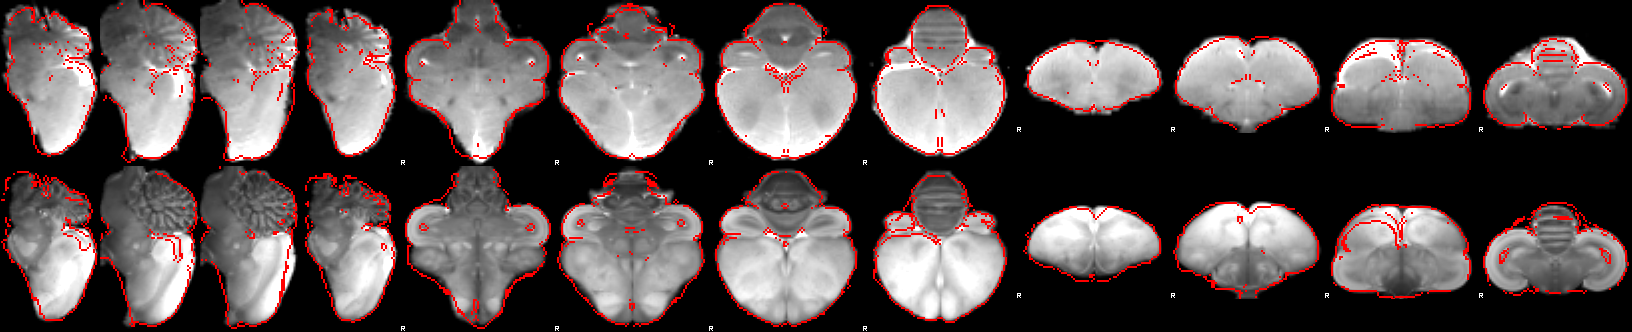

/mnt/d/Data/Chick/analysis/imprinting_2019/sub12/reg/highres2standard.png


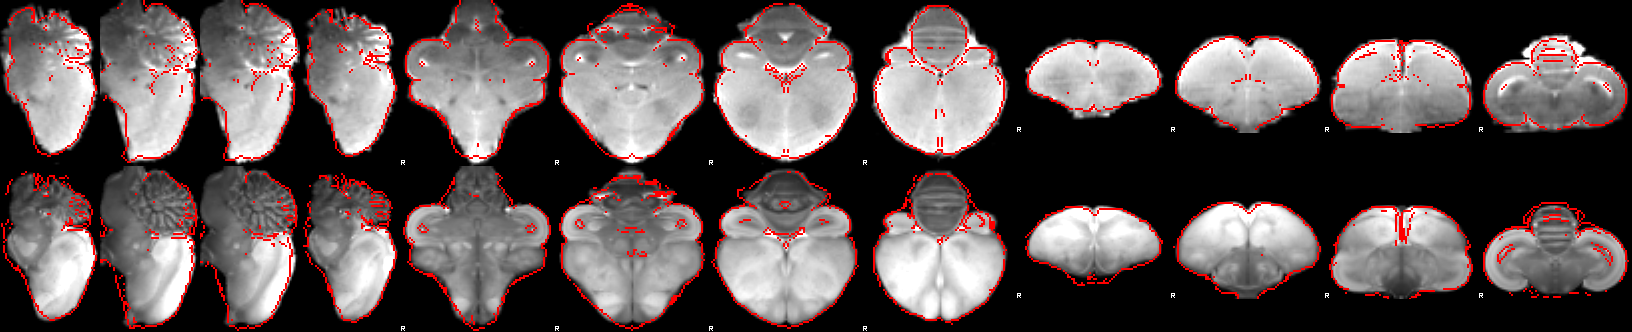

/mnt/d/Data/Chick/analysis/imprinting_2019/sub14/reg/highres2standard.png


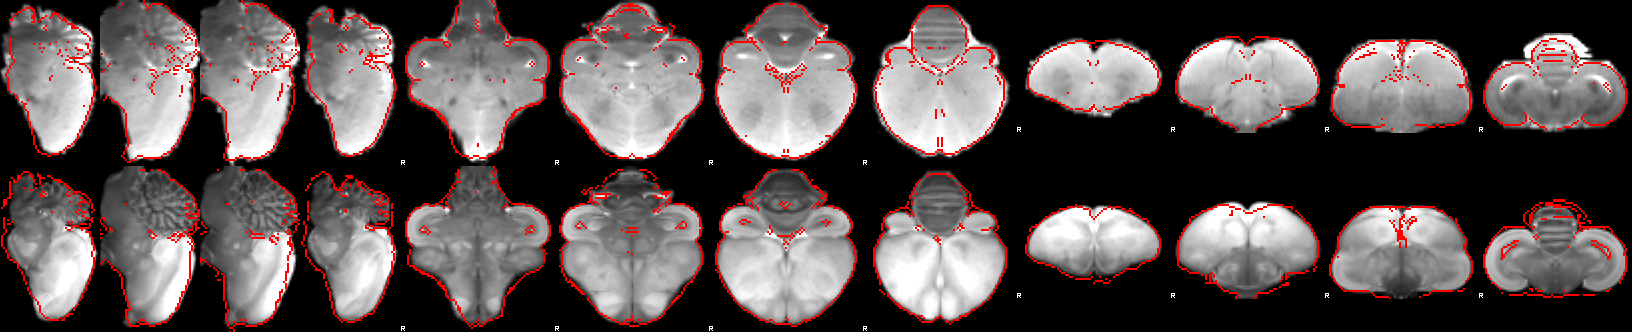

/mnt/d/Data/Chick/analysis/imprinting_2019/sub16/reg/highres2standard.png


/mnt/d/Data/Chick/analysis/imprinting_2019/sub18/reg/highres2standard.png


/mnt/d/Data/Chick/analysis/imprinting_2019/sub19/reg/highres2standard.png


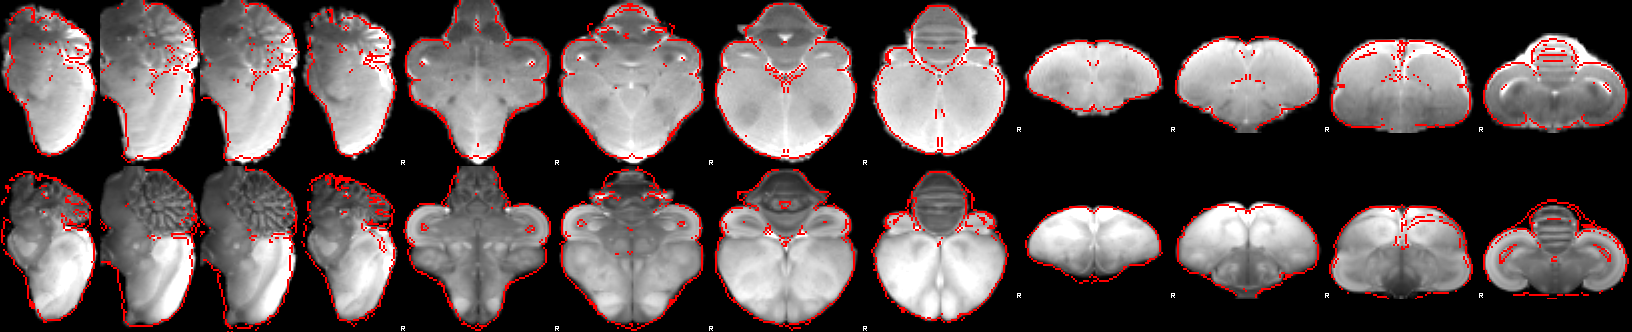

/mnt/d/Data/Chick/analysis/imprinting_2019/sub21/reg/highres2standard.png


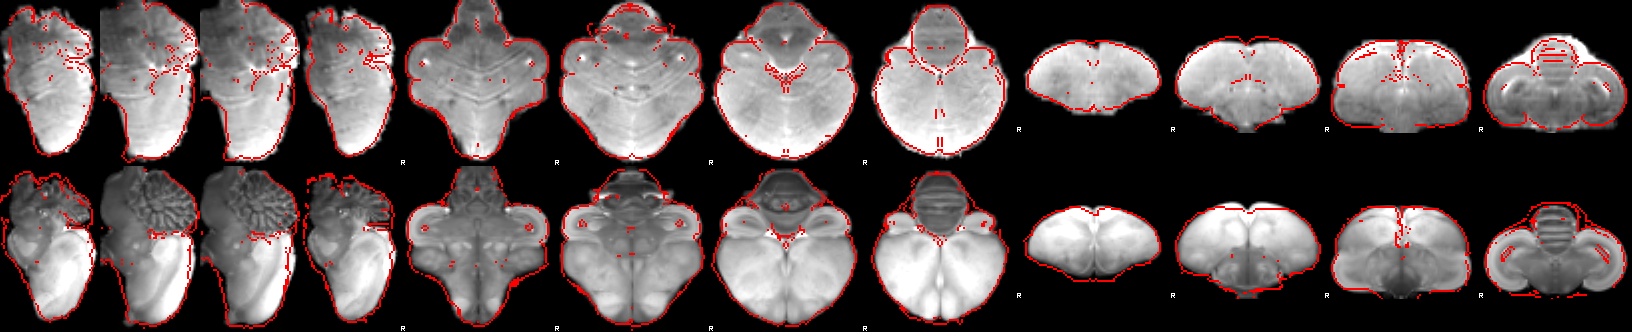

/mnt/d/Data/Chick/analysis/imprinting_2019/sub22/reg/highres2standard.png


/mnt/d/Data/Chick/analysis/imprinting_2019/sub24/reg/highres2standard.png


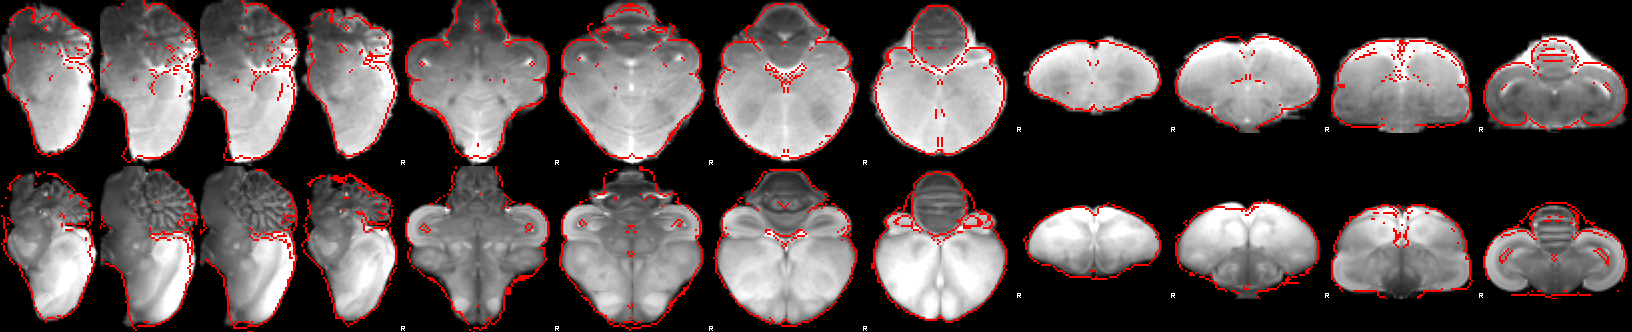

/mnt/d/Data/Chick/analysis/imprinting_2019/sub27/reg/highres2standard.png


/mnt/d/Data/Chick/analysis/imprinting_2019/sub28/reg/highres2standard.png


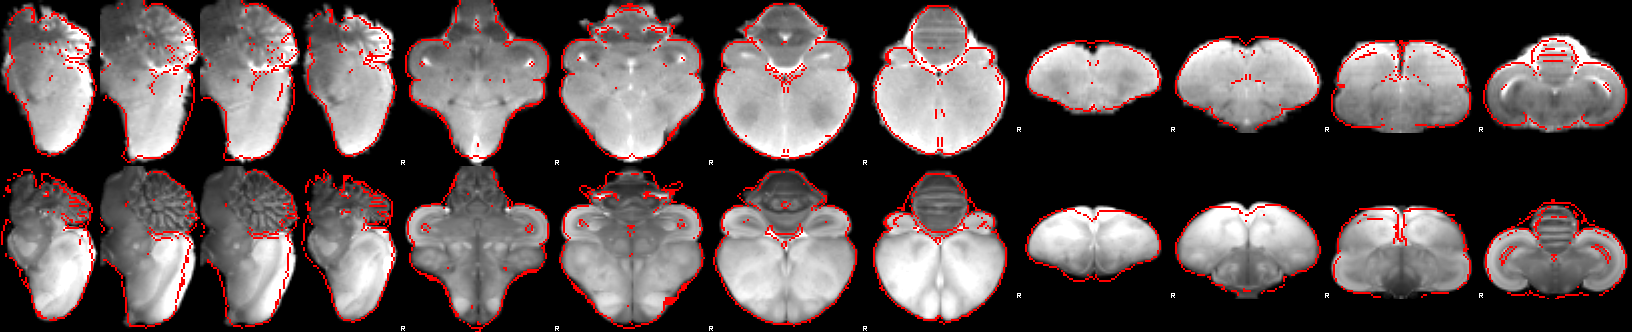

/mnt/d/Data/Chick/analysis/imprinting_2019/sub29/reg/highres2standard.png


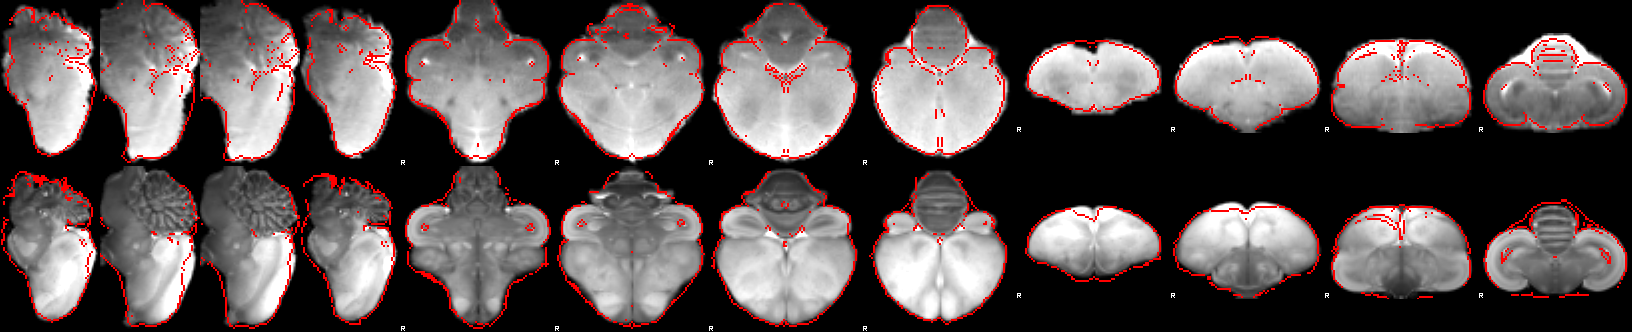

In [51]:
from IPython.display import Image, display
import os
import glob

data_path = '/mnt/d/Data/Chick/analysis/imprinting_2019/'
#subdirs = glob.glob('%s/sub00[1-9]/run00[1-2]'%(data_path))#lob.glob('%s/sub[0-9][0-9][0-9]'%(path))
listOfImageNames = glob.glob('%s/sub*/reg/highres2standard.png'%(data_path))

for imageName in listOfImageNames:
    print(imageName)
    display(Image(filename=imageName))
    
    


# Copy Back the data to the main folder

In [49]:
# creat reg directory in each subject folter and run independent registration over subjects
import os
import glob
from shutil import copy2, rmtree

data_path = '/mnt/d/Data/Chick/analysis/imprinting_2019/'
subdirs = glob.glob('%s/sub*'%(data_path))


for dir in subdirs:
    dst = os.path.join(dir,'func/double-gamma.feat/reg')
    scr = os.path.join(dir,'reg')   
    print(dst)
    if os.path.exists(dst):
        rmtree(dst)
    else:
        pass    
    os.system('cp -r %s %s'%(scr,dst))


/mnt/d/Data/Chick/analysis/imprinting_2019/sub09/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub11/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub12/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub14/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub16/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub18/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub19/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub21/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub22/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub24/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub27/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub28/func/double-gamma.feat/reg
/mnt/d/Data/Chick/analysis/imprinting_2019/sub29/func/double-gamma.feat/reg


# transfer functional data to standard space

In [12]:
# creat reg directory in each subject folter and run independent registration over subjects
import os
import glob
from shutil import copy2, rmtree

data_path = '/mnt/d/Data/Chick/analysis/imprinting_2019/'
subdirs = glob.glob('%s/sub*'%(data_path))
scr = os.path.join(data_path,'MVPA')   
for dir in subdirs:
    os.makedirs(os.path.join(scr,dir[-5:]))
    dst = os.path.join(dir,'func/double-gamma.feat')
    print(scr) 
    os.system('applywarp --ref=%s/reg/standard --in=%s/filtered_func_data --out=%s/%s/func2standard --warp=%s/reg/example_func2standard_warp'%(dst,dst,scr,dir[-5:],dst))
    os.system('cp -r %s/behaviour/res* %s/%s'%(dir,scr,dir[-5:]))

/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
/mnt/d/Data/Chick/analysis/imprinting_2019/MVPA
